**ANALYSIS OF BOX OFFICE MOVIE GROSS EARNINGS**




**Project Problem**:


*   Lack of knowledge on creating movies.






**Project Objectives**


*   Analyzing data on the movie dataset in order to  help the the head of Microsoft's new movie studio decide what type of films to create.
*   Identifying the top studios in the movie industry

*    Identifying the best performing movies that are
currently doing well at the box office






In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# accessing our dataframe
# df.head() gives an output of 5 rows by defalut
df = pd.read_csv('bom.movie_gross.csv.gz')

df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#accessing the last five rows of our dataset
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


We can see we have 5 columns and 3387 rows. Some columns have missing values. The columns are catergorical: and others are numerical

In [4]:
# checking the shape of our dataset in terms of rows and columns
df.shape

(3387, 5)

In [5]:
# describing the data
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
# accessing a general summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Data cleaning

In [7]:
# checking for missing values.
# And the total count of data that is missing per colunm.
df.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [8]:
# checking the proportion of missing values
df.isna().mean()

,0
title,0.000000
studio,0.001476
domestic_gross,0.008267
foreign_gross,0.398583
year,0.000000


In [9]:
# Getting the rows which have missing data.
df[df.isna().any(axis=1)]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
222,Flipped,WB,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
# Dropping all the missing values
df = df.dropna(axis=0,how='all')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
# filling in the missing values in the 'domestic_gross' and 'foreign_gross' with their medians
median_domestic_gross = df['domestic_gross'].median()
df['domestic_gross'] = df['domestic_gross'].fillna(median_domestic_gross)

# Converting 'foreign_gross' to numeric
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

median_foreign_gross = df['foreign_gross'].median()
df['foreign_gross'] = df['foreign_gross'].fillna(median_foreign_gross)

df['studio'] = df['studio'].fillna('Unknown')

print(df)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

In [12]:
# dropping the missing values
df.dropna(inplace=True)
df.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


In [13]:
# Checking our dataset to see if we still have missing values
df.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


.

Checking for Duplicates

Next, we check for any duplicate rows in our dataset. Duplicate entries can skew our analysis, so it's important to identify and handle them. The output confirms that there are no duplicate rows in our data.

In [14]:
# The dataset doesn't have any duplicates
df.duplicated().value_counts()

,count
False,3387


In [15]:
# This further confirms that we do not have any duplicates in our dataset
df.duplicated().sum()

np.int64(0)

In [16]:
# Checking for unique values in our dataset
for x in df.columns:
  print(x, ":",df[x].unique(),'\n')

title : ['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares'] 

studio : ['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' 'Unknown' 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.'
 'Kino' 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.'
 'NAV' 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir'
 'FM' 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM'
 'Elev.' 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM'
 'Argo.' 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.'
 'AGF' 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI'
 'RTWC' 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 

Exploratory data analysis

In [17]:
# Getting a general description of our dataset.
df.describe()

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.851978e+07,5.259091e+07,2013.958075
std,6.675093e+07,1.100108e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.225000e+05,1.175000e+07,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.750000e+07,2.915000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Time Period: The data covers movies released from 2010 to 2018.

In [18]:
# Calculating measures of central tendencies
df.mean(numeric_only=True)

,0
domestic_gross,2.851978e+07
foreign_gross,5.259091e+07
year,2.013958e+03


In [19]:
df.median(numeric_only=True)

,0
domestic_gross,1400000.0
foreign_gross,18900000.0
year,2014.0


In [20]:
df.mode(numeric_only=True)

,domestic_gross,foreign_gross,year
0,1400000.0,18900000.0,2015


In [21]:
# A general description of the 'title' colunm in our dataset
df['title'].describe()


,title
count,3387
unique,3386
top,Bluebeard
freq,2


Standardizing Text

To ensure consistency in our data, we convert the 'title' and 'studio' columns to a uniform format. In this case, we've chosen to capitalize the first letter of each word. This prevents the same studio from being treated as two different entities (e.g., "Sony" and "sony").

In [22]:
# arranging the 1st letters of the studio column and title column into capital letters
df['title'] = df['title'].str.capitalize()
df['studio'] = df['studio'].str.capitalize()
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy story 3,Bv,415000000.0,652000000.0,2010
1,Alice in wonderland (2010),Bv,334200000.0,691300000.0,2010
2,Harry potter and the deathly hallows part 1,Wb,296000000.0,664300000.0,2010
3,Inception,Wb,292600000.0,535700000.0,2010
4,Shrek forever after,P/dw,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The quake,Magn.,6200.0,18900000.0,2018
3383,Edward ii (2018 re-release),Fm,4800.0,18900000.0,2018
3384,El pacto,Sony,2500.0,18900000.0,2018
3385,The swan,Synergetic,2400.0,18900000.0,2018


In [23]:
# Checking for unique values in all our columns.
df.nunique()


,0
title,3386
studio,258
domestic_gross,1797
foreign_gross,1200
year,9


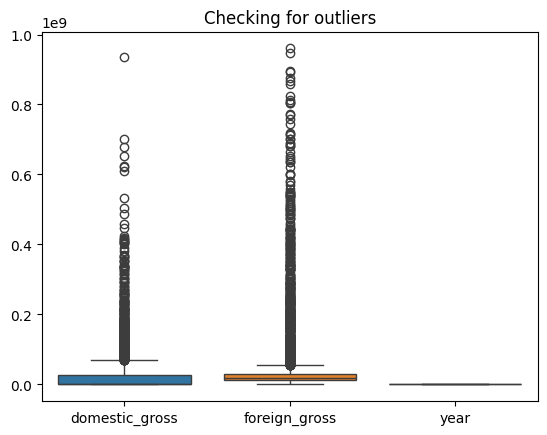

In [24]:
# Checking for the outliers in our dataset
sns.boxplot(data=df)
plt.title('Checking for outliers')
plt.show()

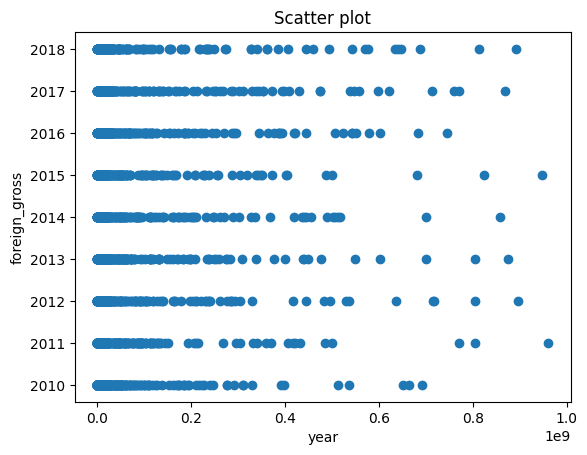

In [25]:
# plotting a scatterplot of 'foreign_gross' against column 'year'
plt.scatter(df['foreign_gross'], df['year'])
plt.xlabel('year')
plt.ylabel('foreign_gross')
plt.title('Scatter plot')
plt.show()

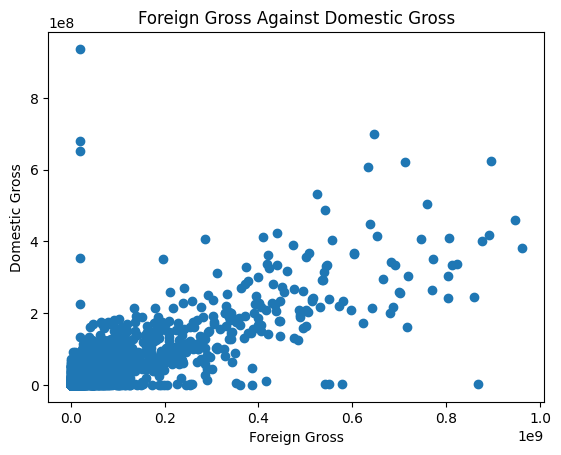

In [26]:

# A scatterplot of 'foreign_gross' against 'domestic_gross'
plt.scatter(df['foreign_gross'], df['domestic_gross'])
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign Gross Against Domestic Gross')
plt.show()

In [27]:
# Checking to see if we still have missing values
df.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


<Axes: >

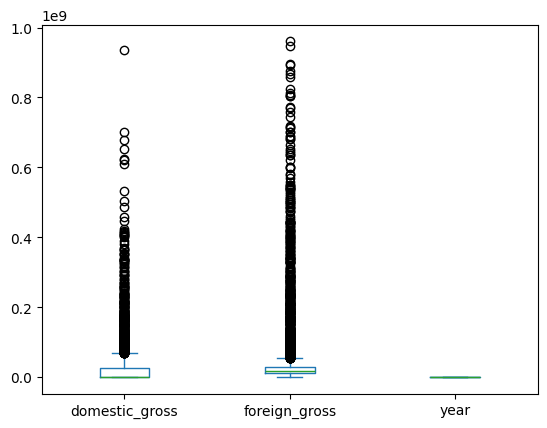

In [28]:
# matplotlib
df.plot(kind='box')

In [29]:
# Checking the mean of our 'domestic_gross'.
df['domestic_gross'].mean()

np.float64(28519779.62208444)

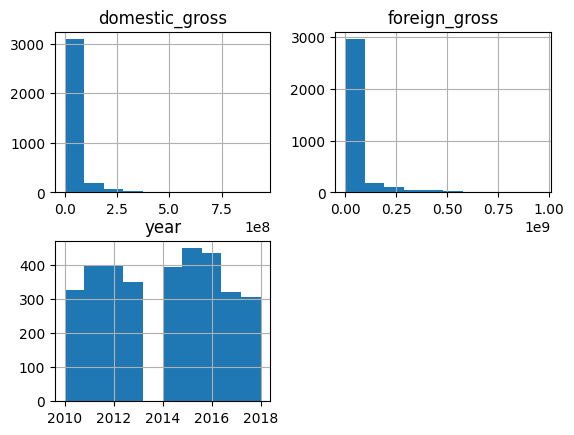

In [30]:
# Plotting a plot with histograms
df.hist()
plt.show()

**Data sets** with high kurts tend to have heavy tails, or outliers. Data sets with low kurts tend to have light tails, or lack of outliers

In [31]:
df.kurt(numeric_only=True)

,0
domestic_gross,32.805415
foreign_gross,20.486789
year,-1.158922



**Distribution of Movie Releases**

We start our visual exploration by looking at how many movies were released each year in our dataset. The histogram below shows the number of movies released per year. This gives us a quick overview of the distribution and helps us see if there were any particularly busy years for movie releases.

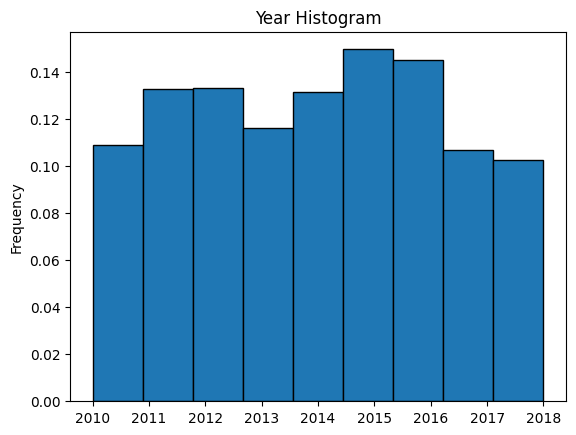

In [32]:
# checking which year had the most number of movie releases
df['year'].plot(kind='hist',bins=9,density = True, edgecolor='black')
plt.title('Year Histogram')
plt.show()

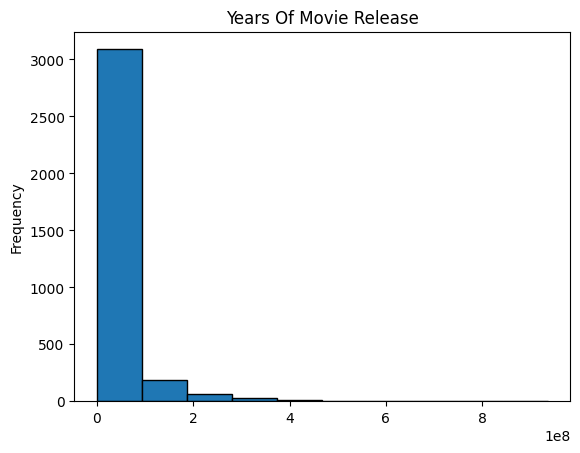

In [33]:
df['domestic_gross'].plot(kind='hist', edgecolor='black')
plt.title('Years Of Movie Release')
plt.show()

**The Big Competitors**
The main studio competitors in the movie industry are;

1. ifc
2. Universal
3. Warner Bros
4. Fox studios

They have been really consistent in the release of movies since they joined the movie industry



In [34]:
# The best studios based on their movie releases
studio = df['studio'].value_counts()
studio

,count
studio,
Ifc,166
Uni.,147
Wb,140
Fox,136
Magn.,136
...,...
Ef,1
Arrow,1
Hiber,1


Performing Studios

Other top performing studios to note in the movie production industry since they have also been consistent in movie release

In [35]:
# Getting Only the top_10 studios with the most movie releases and their counts()
df['studio'].value_counts().head(10)

,count
studio,
Ifc,166
Uni.,147
Wb,140
Fox,136
Magn.,136
Spc,123
Sony,110
Bv,106
Lgf,103


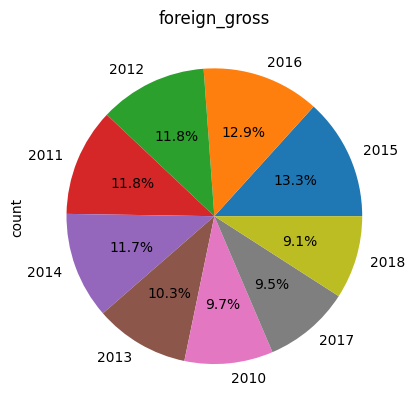

In [36]:
# using a pie chart visual to distribute our foreign_gross income earned per the year
# of movie releasein percentges.

df['year'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('foreign_gross')
plt.show()

In [37]:
# loading the columns that only have Numerics in our dataset
df.corr(numeric_only=True)

,domestic_gross,foreign_gross,year
domestic_gross,1.000000,0.785976,0.020279
foreign_gross,0.785976,1.000000,0.057189
year,0.020279,0.057189,1.000000


 Correlation Analysis

Finally, we created a correlation heatmap. This is a powerful visual tool that shows how our numeric variables relate to each other. For example, we can see the strength of the relationship between a movie's domestic_gross and its year of release. Our initial analysis showed a very weak positive correlation, suggesting there isn't a strong linear relationship between the year a movie is released and its domestic earnings in this dataset.

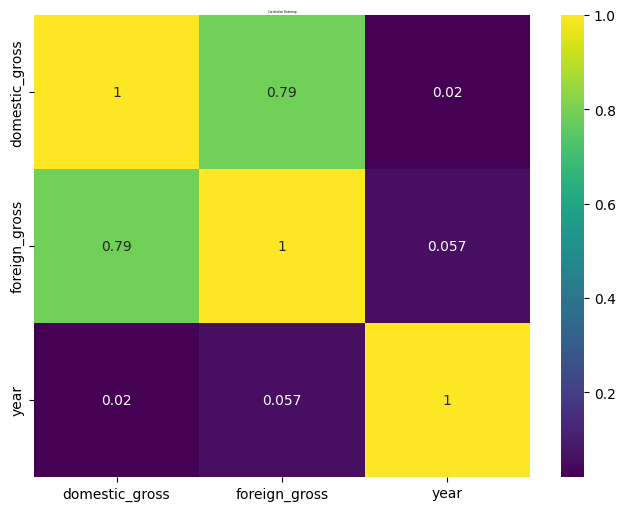

In [38]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':2}, pad=2);

Text(0.5, 1.0, 'Features Correlating with Domestic Gross')

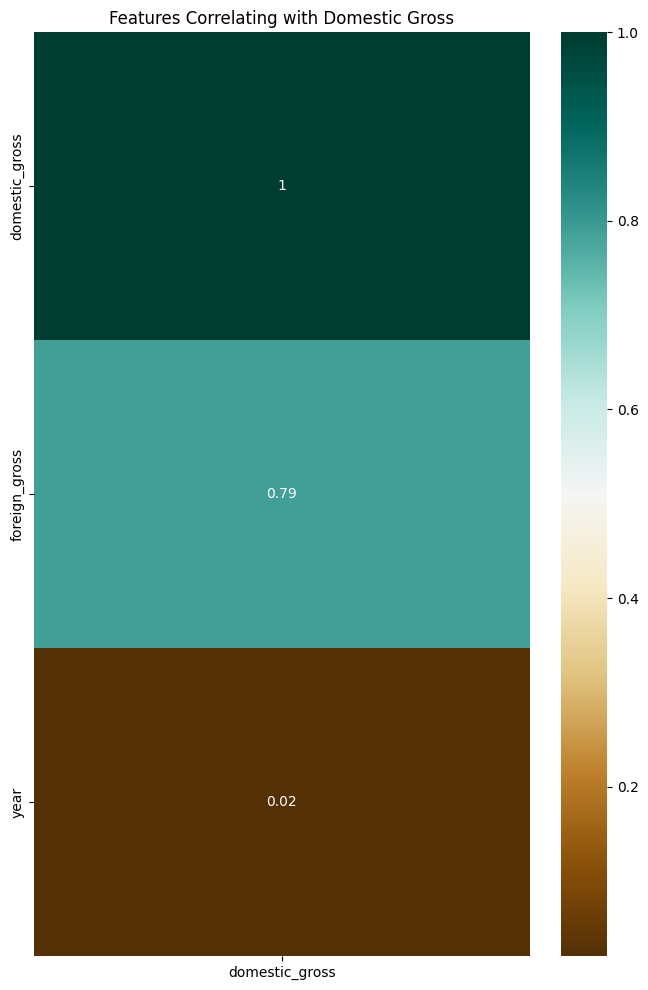

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(numeric_only=True)[['domestic_gross']].sort_values(by='domestic_gross', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Domestic Gross')

 Gross Earnings Over Time

To understand revenue trends, we create line plots that track both domestic and foreign gross earnings over the years. This visualization helps us see whether movie revenues have been generally increasing, decreasing, or staying flat over the period covered by our data.

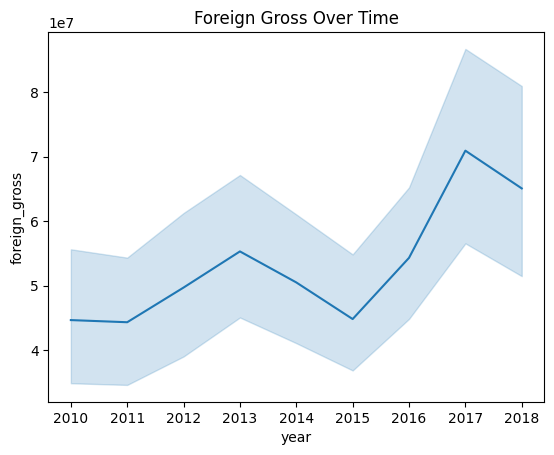

In [41]:
sns.lineplot(data=df,x=df['year'],y=df['foreign_gross'])
plt.title('Foreign Gross Over Time')
plt.show()

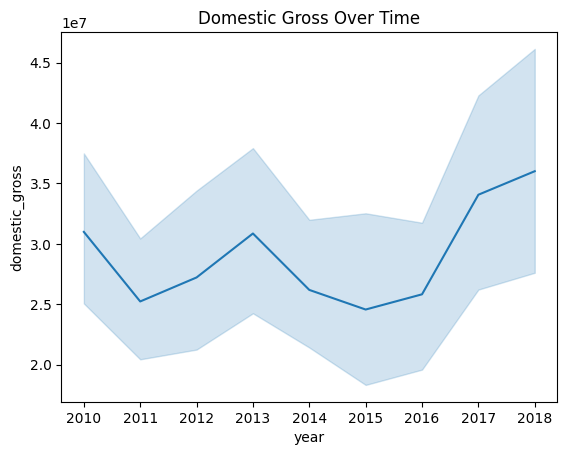

In [42]:
sns.lineplot(data=df,x=df['year'],y=df['domestic_gross'])
plt.title('Domestic Gross Over Time')
plt.show()

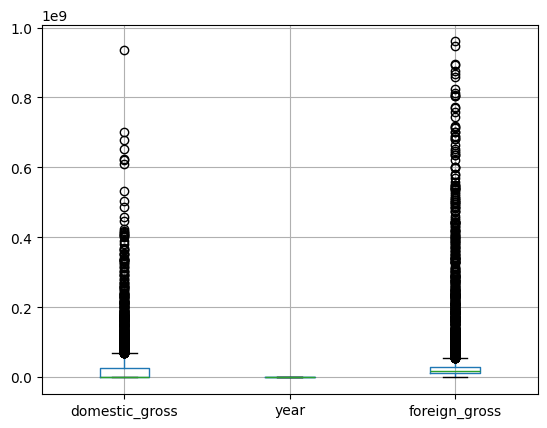

<Figure size 1000x800 with 0 Axes>

In [43]:
# Checking each of the columns in our dataset for outliers
# The foreing_gross column and domestic_gross column have a lot of outliers
df[['domestic_gross', 'studio', 'title', 'year', 'foreign_gross']].boxplot()
plt.figure(figsize=(10,8))
plt.show()


Domestic vs. Foreign Gross

The scatter plot below compares the domestic and foreign gross earnings for each movie. This is a great way to see if there's a relationship between the two. For example, do movies that do well in the domestic market also tend to do well in foreign markets? This plot can give us a visual clue.

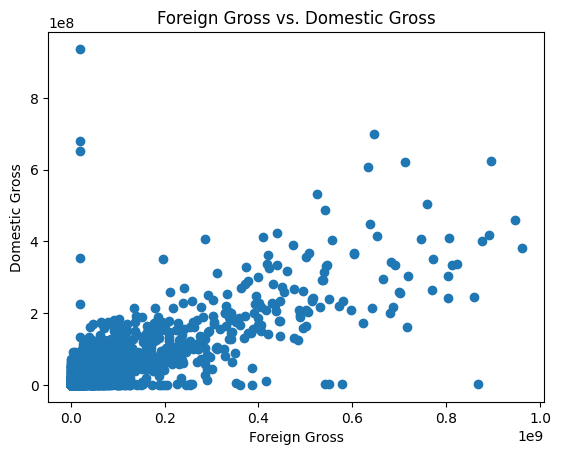

In [44]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

plt.scatter(df['foreign_gross'], df['domestic_gross'])
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign Gross vs. Domestic Gross')
plt.show()

Top Performing Studios

Identifying the studios that have produced the most films. The bar chart below shows the top 10 studios with the highest number of movie releases. This helps us understand which studios are the major players in the industry, at least in terms of production volume.

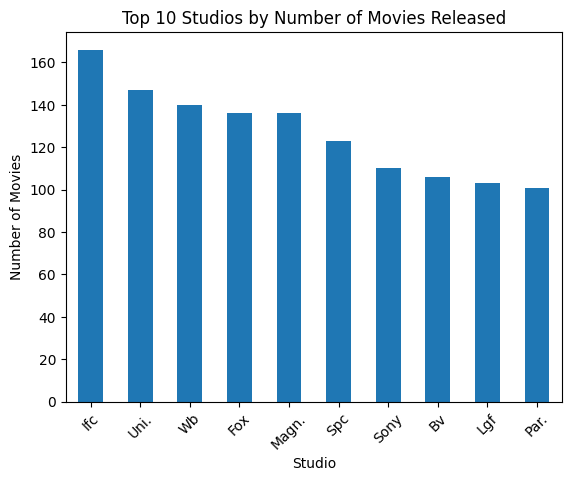

In [45]:
# This is based on the number of movies relesed by the studios over the given years
studio.head(10).plot(kind='bar')
plt.title('Top 10 Studios by Number of Movies Released')
plt.ylabel('Number of Movies')
plt.xlabel('Studio')
plt.xticks(rotation=45)
plt.show()

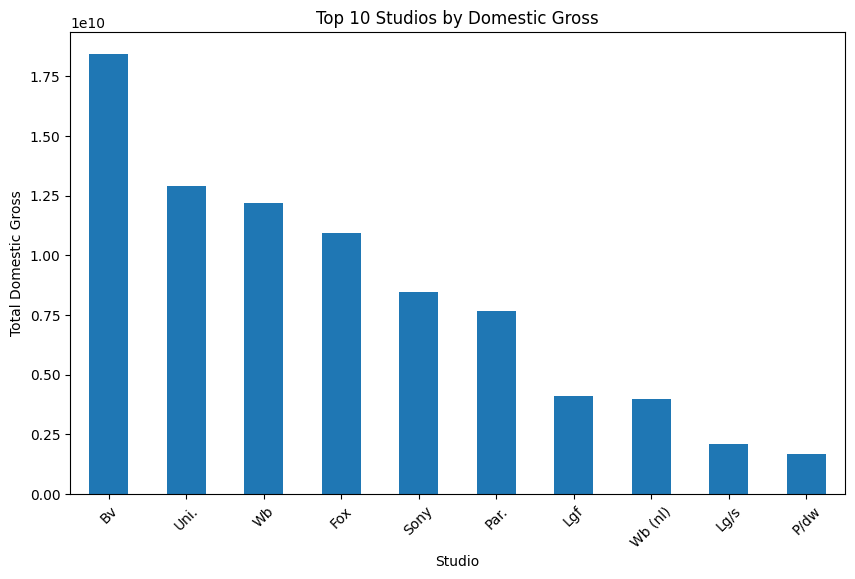

In [46]:
# Top 10 studios based on domestic_gross.
top_10_studios = df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_studios.plot(kind='bar')
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross')
plt.xticks(rotation=45)
plt.show()

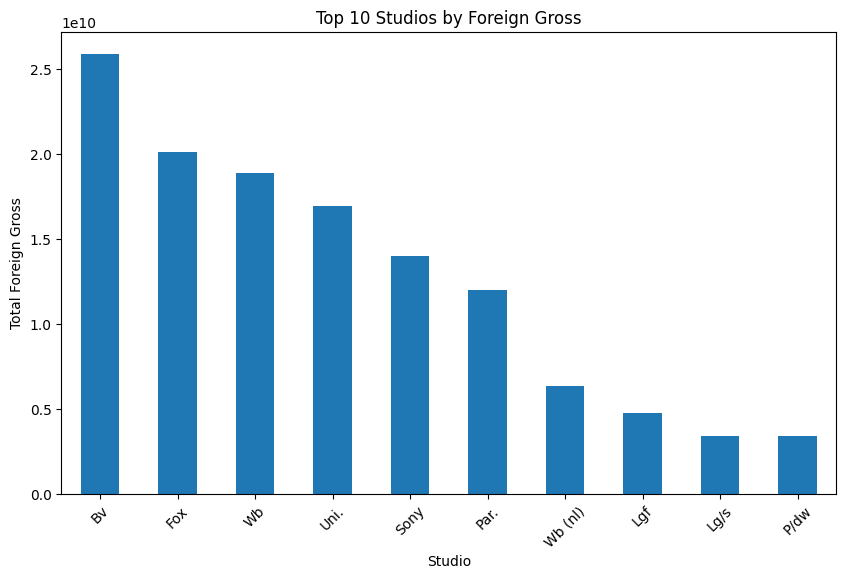

In [47]:
# Top 10 studios based on domestic_gross.
top_10_studios = df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_studios.plot(kind='bar')
plt.title('Top 10 Studios by Foreign Gross')
plt.xlabel('Studio')
plt.ylabel('Total Foreign Gross')
plt.xticks(rotation=45)
plt.show()

This df.info() shows that the missing values in our dataset were dropped and now all our colunms have the same entries

In [48]:
# This shows that there are no missing values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [49]:
# creating a new column in our dataset('total_gross') from the domestic_gross and foreign_gross
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy story 3,Bv,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in wonderland (2010),Bv,334200000.0,691300000.0,2010,1.025500e+09
2,Harry potter and the deathly hallows part 1,Wb,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,Wb,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek forever after,P/dw,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The quake,Magn.,6200.0,18900000.0,2018,1.890620e+07
3383,Edward ii (2018 re-release),Fm,4800.0,18900000.0,2018,1.890480e+07
3384,El pacto,Sony,2500.0,18900000.0,2018,1.890250e+07
3385,The swan,Synergetic,2400.0,18900000.0,2018,1.890240e+07


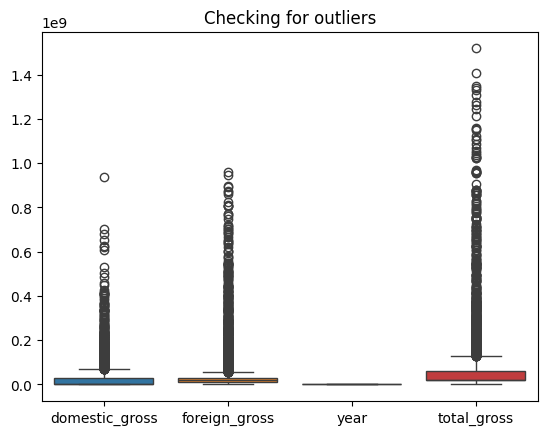

In [50]:
sns.boxplot(data=df)
plt.title('Checking for outliers')
plt.show()

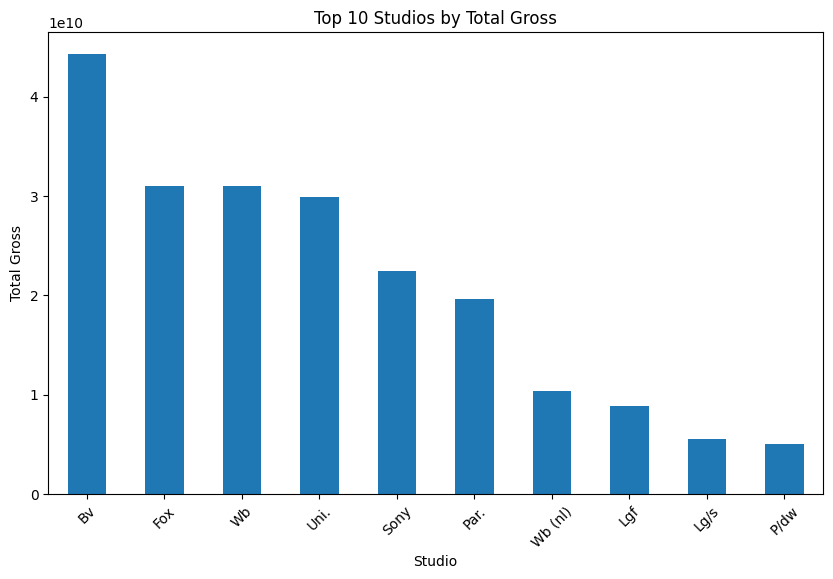

In [51]:
# Top 10 studios based on their total_gross earnings
top_10_studios_total_gross = df.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_studios_total_gross.plot(kind='bar')
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.show()


A correlation heatmap showing a very strong positive correlation between 'total_gross' and both 'domestic_gross' and 'foreign_gross', which is expected as 'total_gross' is their sum.

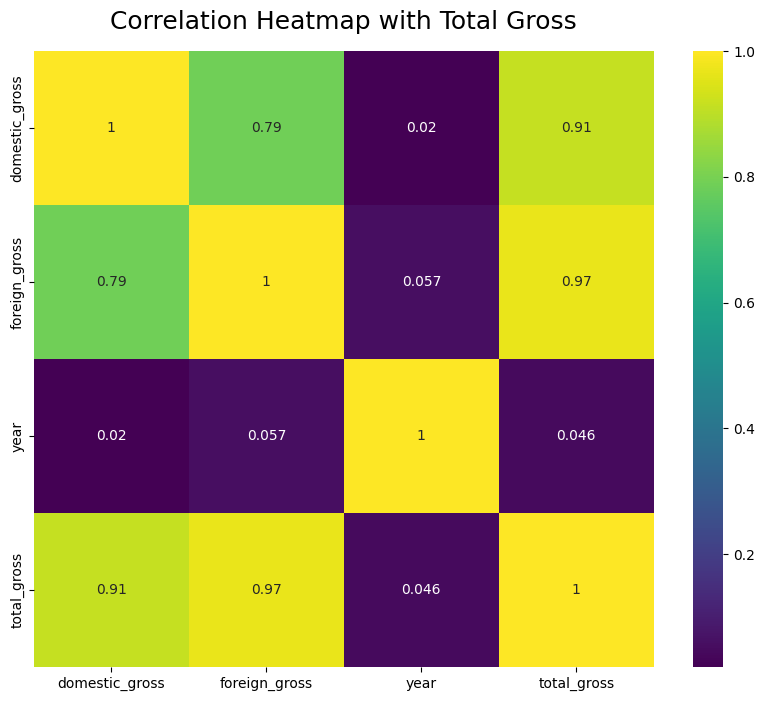

In [52]:
# A correlation heatmap with the Total Gross
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap with Total Gross', fontdict={'fontsize':18}, pad=16);
plt.show()

**Summary Of Findings **


   
*     The dataset is rich with information but required
      cleaning ,especially in the 'foreign_gross' column.
   A few studios are responsibe for a large portion of
the movies released .

*   
   A few studios are responsibe for a large portion of
the movies released .

*   There isn't a strong simple relationship between the year of release and a movie's gross earnings .





**Conclusion**
